## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_unique = mouse_study_complete["Mouse ID"].unique()
mouse_count = len(mouse_unique)
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete.duplicated(subset=None, keep='first')
duplicate_mice_df = mouse_study_complete.copy()
duplicate_mice_df["Duplicate row"] = duplicate_mice
only_duplicates_df = duplicate_mice_df.loc[duplicate_mice_df["Duplicate row"] == True,["Mouse ID", "Timepoint"]]
only_duplicates_df


,Mouse ID,Timepoint
909,g989,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
only_duplicates_all_df = duplicate_mice_df.loc[duplicate_mice_df["Duplicate row"] == True,:]
only_duplicates_all_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate row
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_unique_clean = mouse_study_complete["Mouse ID"].unique()
mouse_count_clean = len(mouse_unique_clean)
mouse_count_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_groupby = mouse_study_complete.groupby(["Drug Regimen"])
drug_regimen_mean = drug_regimen_groupby["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen_groupby["Tumor Volume (mm3)"].median()
drug_regimen_variance = drug_regimen_groupby["Tumor Volume (mm3)"].var()
drug_regimen_stdev = drug_regimen_groupby["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen_groupby["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Tumor Volume Mean": drug_regimen_mean, "Tumor Volume Median": drug_regimen_median,
                                     "Tumor Volume Variance": drug_regimen_variance, "Tumor Volume Standard Deviation": drug_regimen_stdev,
                                     "Tumor Volume Standard Error": drug_regimen_sem})
summary_statistics_df.head(10)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_groupby.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

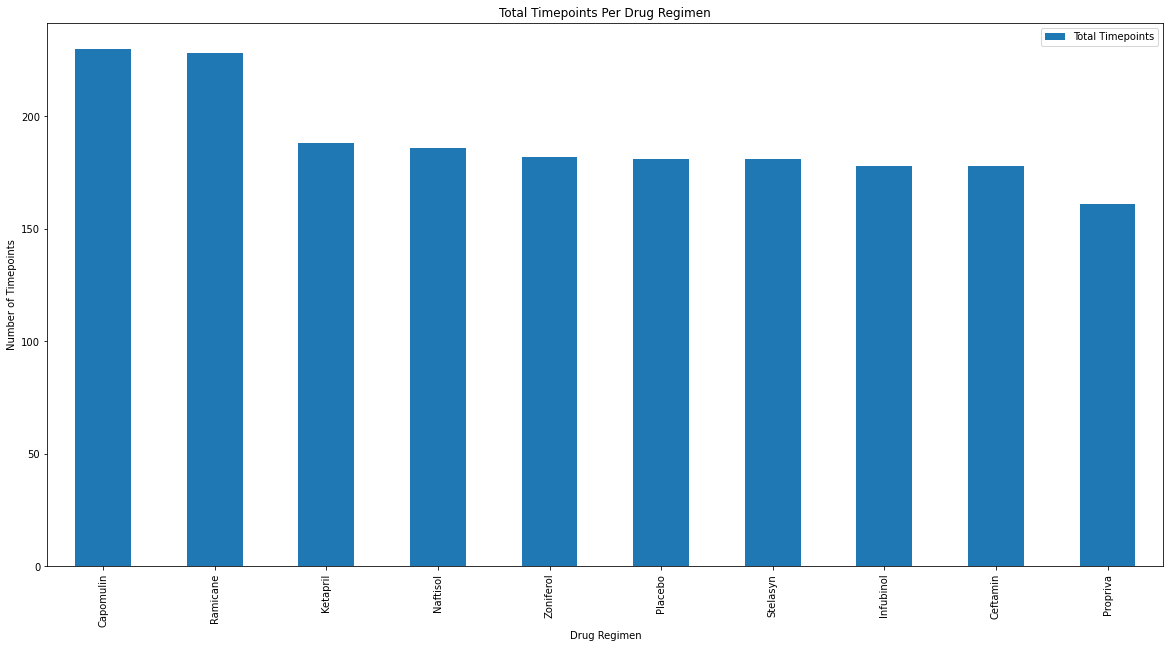

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Create a dataframe of the total timepoints for each regimen

total_timepoints = mouse_study_complete["Drug Regimen"].value_counts()
    
drug_timepoints_df = pd.DataFrame({"Total Timepoints": total_timepoints})

#Create the bar graph
panda_bar_plot = drug_timepoints_df.plot(kind="bar", figsize=(20,10))
plt.title("Total Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()


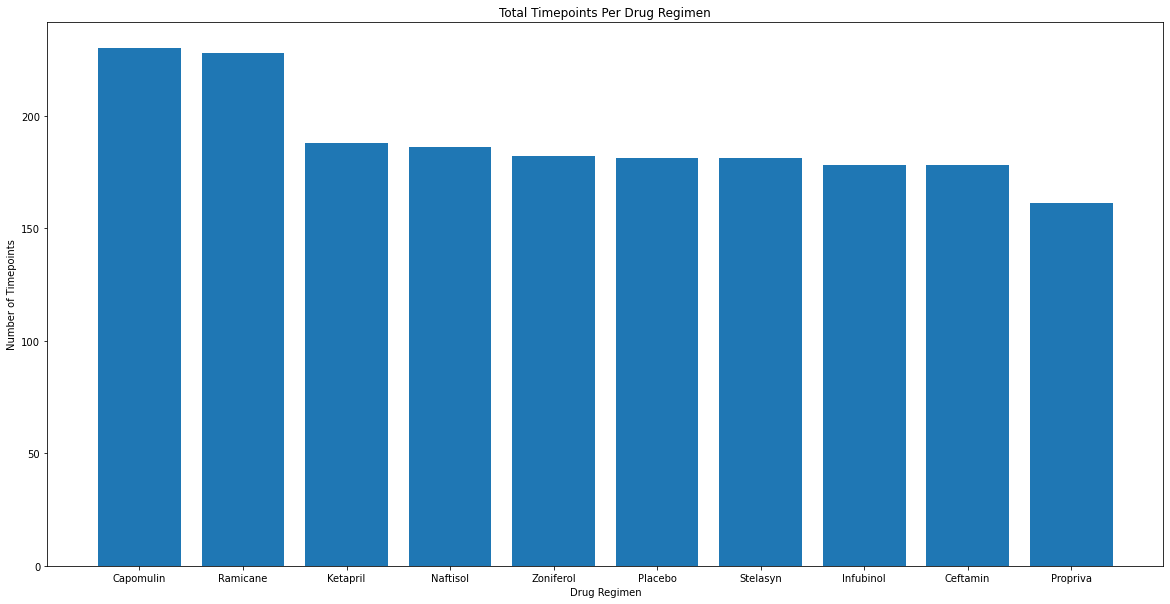

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_study_complete["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"])
plt.title("Total Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_axis, total_timepoints, align="center")
plt.show()



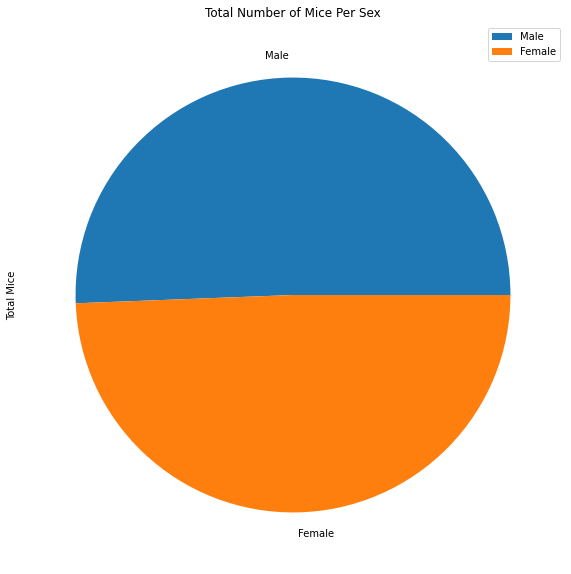

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Create a dataframe of the total number of mice for each sex

total_each_sex = mouse_study_complete["Sex"].value_counts()
    
mouse_gender_df = pd.DataFrame({"Total Mice": total_each_sex})

#Create the pie plot
panda_pie_plot = mouse_gender_df.plot(kind="pie", subplots=True, figsize=(20,10))
plt.title("Total Number of Mice Per Sex")
plt.show()


C:\AnacondaPython\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


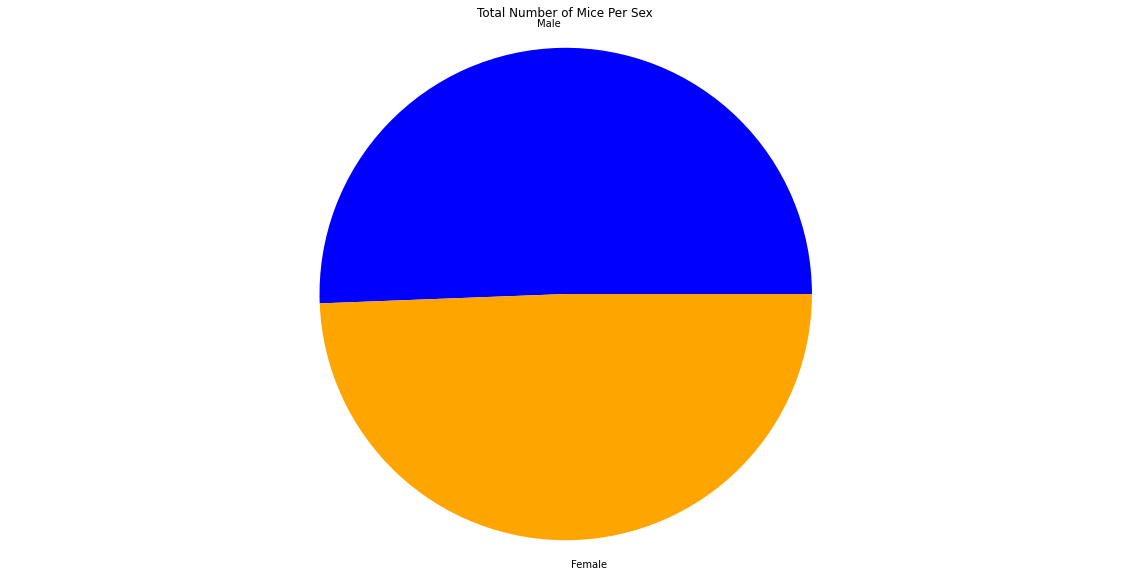

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "orange"]
plt.rcParams["figure.figsize"] = (20,10)
plt.pie(mouse_gender_df, labels=labels, colors=colors)
plt.axis("equal")
plt.title("Total Number of Mice Per Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_df = mouse_study_complete.groupby(["Mouse ID"])["Timepoint"].max()
mouse_timepoint_df = mouse_timepoint_df.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_complete2 = mouse_timepoint_df.merge(mouse_study_complete, how="left", on=["Mouse ID","Timepoint"])
mouse_study_complete2.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
last_tumor_volume = []
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
for drug in treatment_list:
    final_volume = mouse_study_complete2.loc[mouse_study_complete2["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    last_tumor_volume.append(final_volume) 
       
# Determine outliers using upper and lower bounds
lowerq = np.quantile(last_tumor_volume,0.25)
upperq = np.quantile(last_tumor_volume,0.75)
iqr = upperq - lowerq
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Tumor volumes below {lower_bound} could be outliers.")
print(f"Tumor volumes above {upper_bound} could be outliers.")


The lower quartile of tumor volumes is: 37.187743802499995
The upper quartile of tumor volumes is: 59.930261755000004
The interquartile range of tumor volumes is: 22.74251795250001
Tumor volumes below 3.0739668737499812 could be outliers.
Tumor volumes above 94.04403868375002 could be outliers.


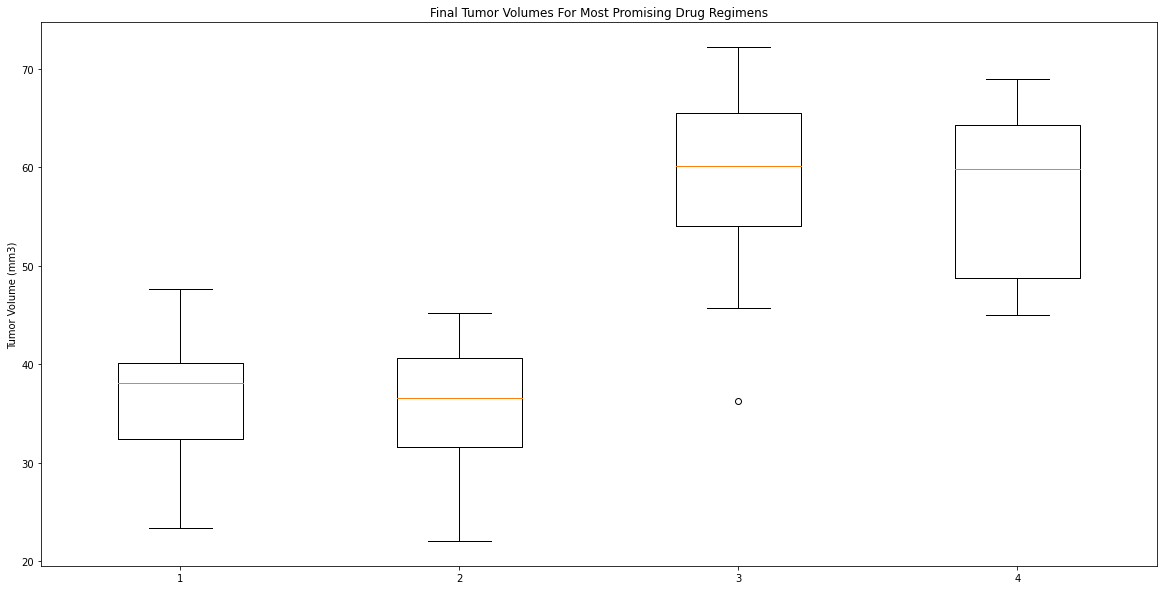

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes For Most Promising Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(last_tumor_volume)
plt.show()

## Line and Scatter Plots

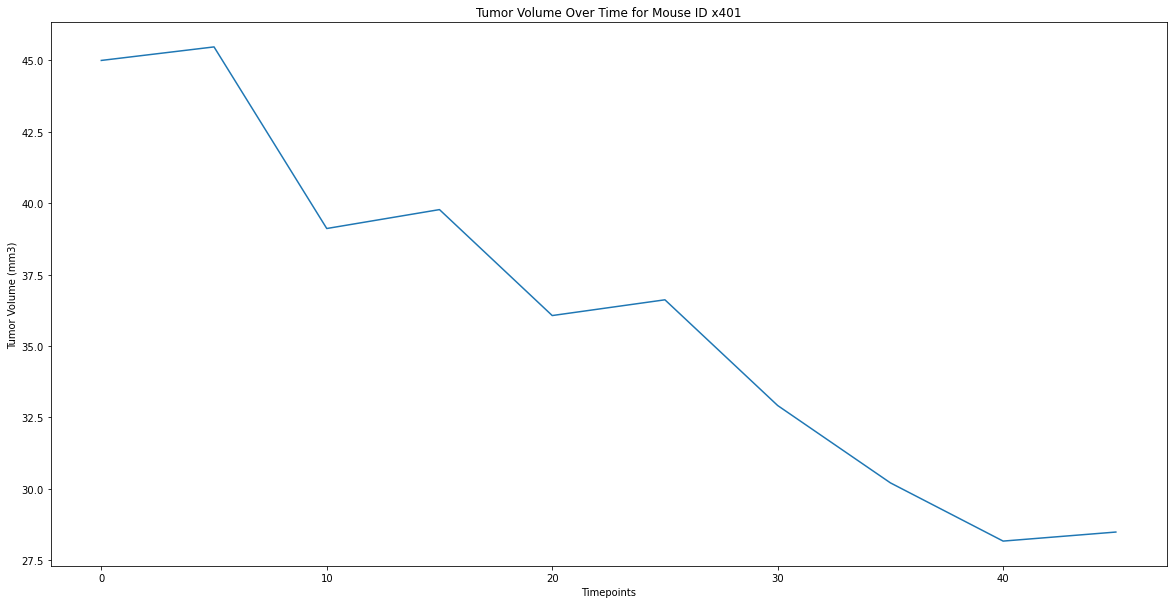

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoints = [0,5,10,15,20,25,30,35,40,45]
mouse_tumor_volume = []
for x in range(0,1893):
    if(mouse_study_complete.iloc[x,0] == 'x401'):
       mouse_tumor_volume.append(mouse_study_complete.iloc[x,6])
       
plt.plot(timepoints, mouse_tumor_volume)
plt.title("Tumor Volume Over Time for Mouse ID x401")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

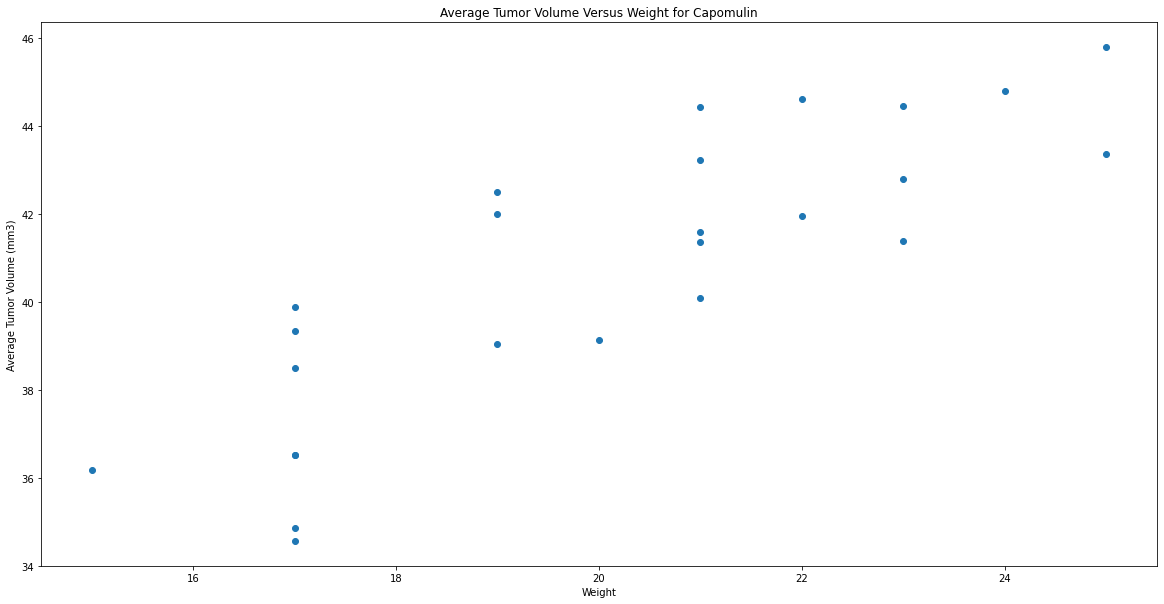

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_only_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == 'Capomulin']
cap_only_mice = cap_only_df.groupby("Mouse ID")
cap_avg_weight = cap_only_mice["Weight (g)"].mean()
cap_avg_tumor = cap_only_mice["Tumor Volume (mm3)"].mean()

plt.scatter(cap_avg_weight, cap_avg_tumor, marker="o")
plt.title("Average Tumor Volume Versus Weight for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume is 0.84


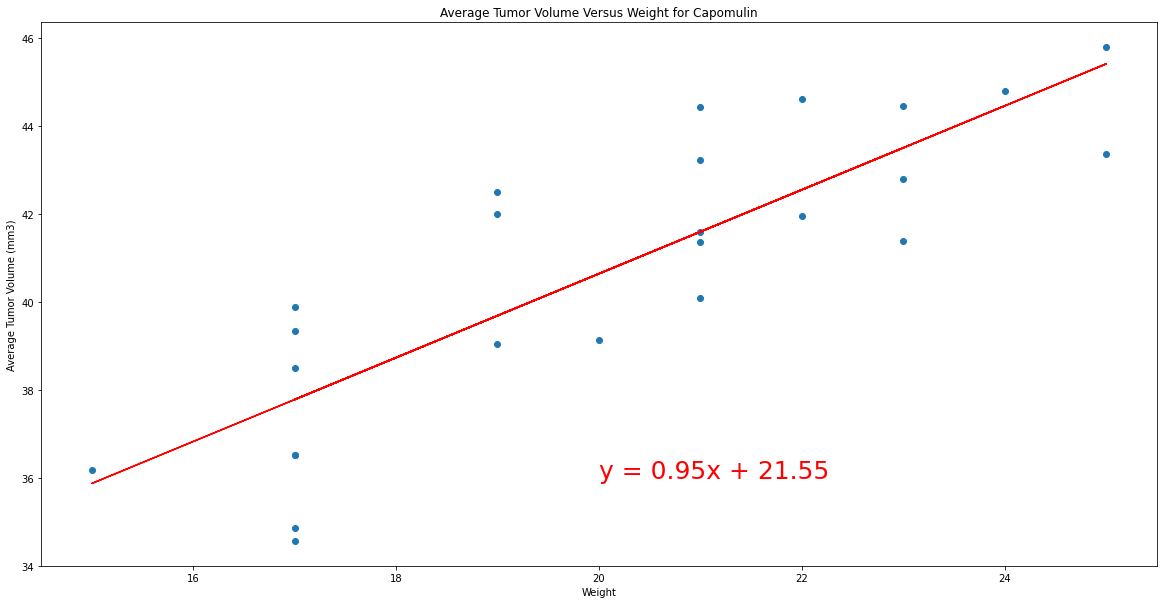

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_avg_weight, cap_avg_tumor)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_avg_weight, cap_avg_tumor)
regress_values = cap_avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(cap_avg_weight, cap_avg_tumor, marker="o")
plt.plot(cap_avg_weight, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=25,color="red")
plt.title("Average Tumor Volume Versus Weight for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()